In [1]:
import epipack
import matplotlib.pyplot as plt
import numpy as np
from epipack import StochasticEpiModel
import networkx as nx
plt.rcParams['font.size'] = 22

/Users/katharinaledebur/opt/anaconda3/lib/python3.9/site-packages/epipack/stochastic_epi_models.py:18: UserWarning: Couldn't find the efficient implementation of `SamplableSet` (see github.com/gstonge/SamplableSet). Proceeding with less efficient implementation.
  warnings.warn("Couldn't find the efficient implementation of `SamplableSet` (see github.com/gstonge/SamplableSet). Proceeding with less efficient implementation.")


In [2]:
# Network settings 

p = 0.0097
N = 1000

# G = nx.erdos_renyi_graph(N, p, seed=2, directed=False)
# nx.draw(G, node_size = 8, width = 0.3, edge_color = 'grey')
# G.number_of_edges()
network = nx.erdos_renyi_graph(N, p, seed=2, directed=False)


In [3]:
nruns = 100

In [48]:
def n_run_model(nruns, network, rates, compartments, link_transmissions, homo_bool, infected_ratio):
    
    N = network.number_of_nodes()
    I_init = int(infected_ratio * N)
    
    
    if homo_bool == False:
        
        chosen_inf_ag = np.random.choice(['F','C'],1)[0]
        if chosen_inf_ag == 'F':
            F_init = ((N-I_init)-1)/2
            C_init = ((N-I_init)+1)/2
        else:
            C_init = ((N-I_init)-1)/2
            F_init = ((N-I_init)+1)/2

        init_dict = {   'F': int(F_init),
                        'C': int(C_init),
                        'E': 0,
                        'I': I_init,
                         'R': 0 }
    elif homo_bool == True:
        
        init_dict = {   'S': N-I_init,
                'E': 0,
                'I': I_init,
                'R': 0  }
        
        
    
    
    edges = [ (e[0], e[1], 1) for e in \
          network.edges() ]
    

    # processes
    node_transition = [
     
        ('E', rates['gamma'], 'I'),
        ('I', rates['beta'], 'R'),
            ]
   
       
    
    nt = []
    nresults = []
    
    for n in range(nruns):
    
        model = StochasticEpiModel(
               compartments=compartments,
               N=N,
               edge_weight_tuples=edges
               )\
           .set_link_transmission_processes(link_transmission)\
           .set_node_transition_processes(node_transition)\
           .set_random_initial_conditions(init_dict)



        t, result = model.simulate(100)
        nt.append(t)
        nresults.append(result)
    
    return nt, nresults

## homogeneous

In [51]:
# model settings
compartments = list("SEIR")

rates = {'alpha': 0.1, 'gamma': 1/3, 'beta': 1/5, 'red': 1}



link_transmission = [
        ('I', 'S',rates['alpha'] * rates['red'], 'I', 'E')]

infected_ratio = 0.001

allt, allr = n_run_model(nruns,network, rates, compartments, link_transmission, True,infected_ratio )

Text(0.5, 0, 'time t')

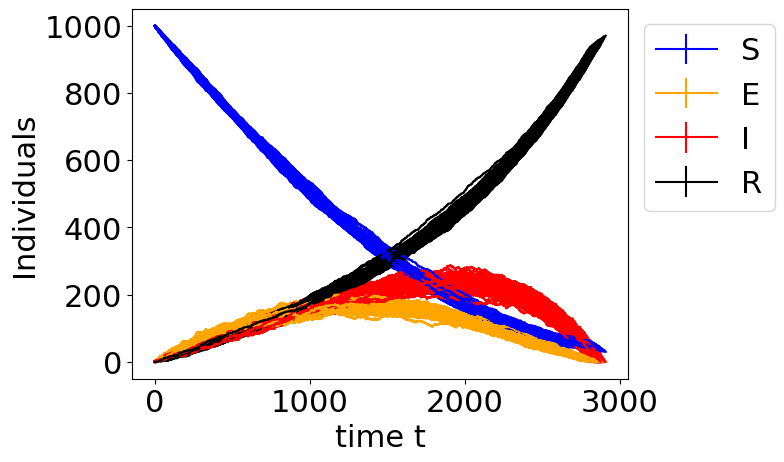

In [54]:
comps = ['S', 'E', 'I', 'R']
colors = ['b', 'orange', 'r', 'k']

fig_homo = plt.figure()
for nr in range(nruns):
    i = 0
    for ind in comps:
        plt.errorbar(range(len(allt[nr])),allr[nr][ind] ,yerr=0,c=colors[i])
        i += 1
plt.legend(comps)

plt.legend(comps,bbox_to_anchor= [1,1])
plt.ylabel('Individuals')
plt.xlabel('time t')

## heterogeneous

In [55]:
compartments = list("FCEIR")

rates = {'alpha': 0.1, 'gamma': 1/3, 'beta': 1/5, 'red_reck': 1.5, 'red_scared': 0.5}


link_transmission = [
    ('I', 'F',rates['alpha']*rates['red_scared'], 'I', 'E'),
    ('I', 'C',rates['alpha']*rates['red_reck'], 'I', 'E')
]



In [56]:
allt_het, allr_het = n_run_model(nruns,network, rates, compartments, link_transmission,False, infected_ratio)

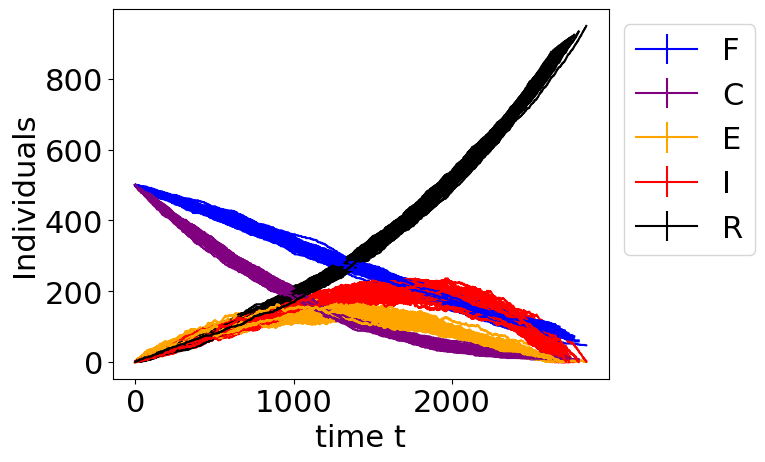

In [57]:
comps = ['F', 'C', 'E', 'I', 'R']
colors = ['b', 'purple', 'orange', 'r', 'k']
fig_het = plt.figure()
i = 0
for nr in range(nruns):
    for ind in comps:
        plt.errorbar(range(len(allt_het[nr])), allr_het[nr][ind],yerr=0,c=colors[i])
        i += 1
    i = 0
plt.legend(comps,bbox_to_anchor= [1,1])
plt.ylabel('Individuals')
plt.xlabel('time t');

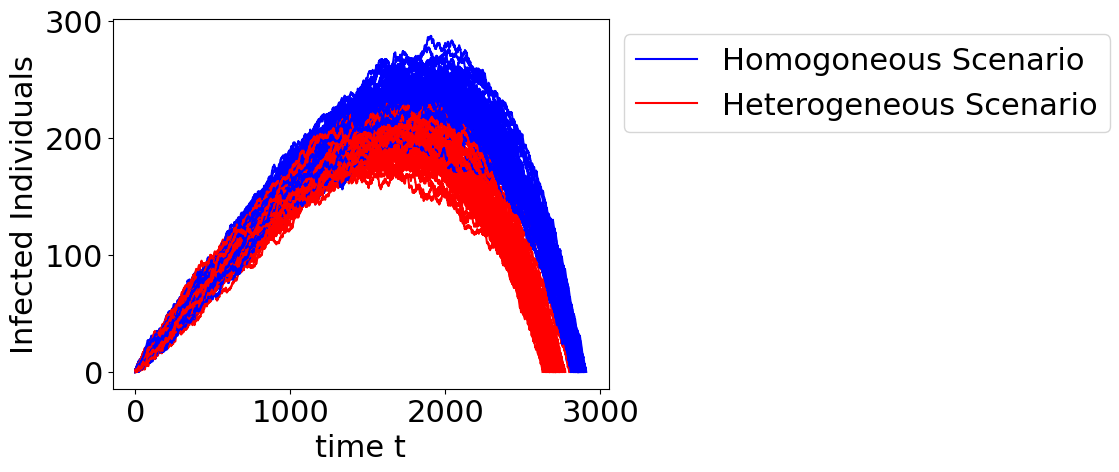

In [58]:
for nr in range(nruns):
    plt.plot(range(len(allt[nr])), allr[nr]['I'], c = 'b')
    plt.plot(range(len(allt_het[nr])), allr_het[nr]['I'], c= 'r')
plt.legend(['Homogoneous Scenario', 'Heterogeneous Scenario'], bbox_to_anchor=[1,1]) ; 
plt.ylabel('Infected Individuals')
plt.xlabel('time t');

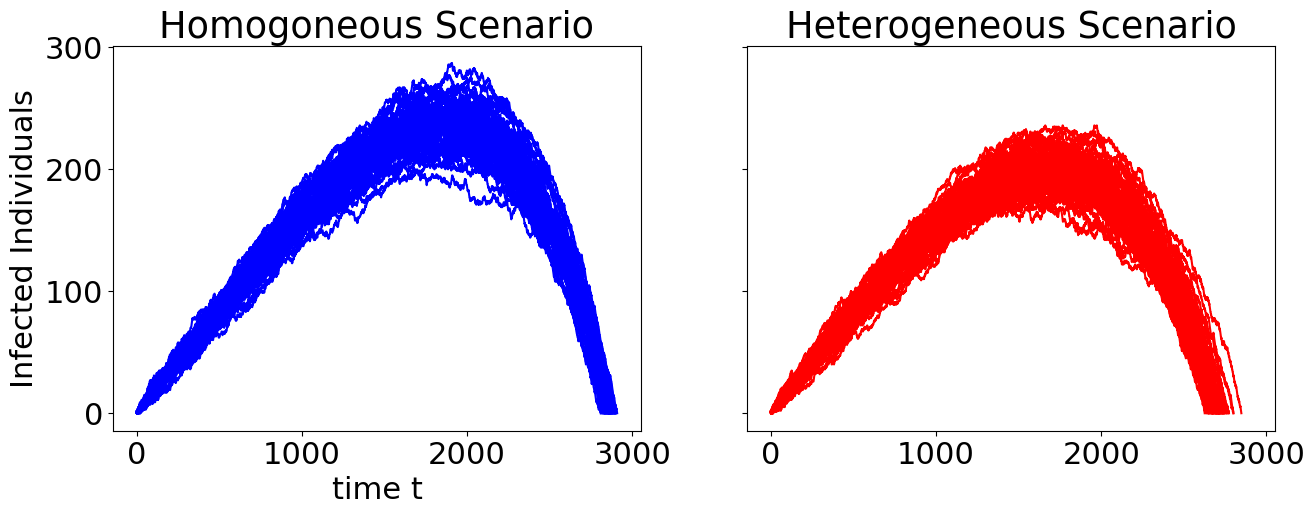

In [64]:
fig, ax = plt.subplots(1,2, sharex = True, sharey = True,figsize = (15,5))
for nr in range(nruns):
    ax[0].plot(range(len(allt[nr])), allr[nr]['I'], c = 'b')
    ax[1].plot(range(len(allt_het[nr])), allr_het[nr]['I'], c= 'r')
    ax[0].set_ylabel('Infected Individuals')
    ax[0].set_xlabel('time t');
    ax[0].set_title('Homogoneous Scenario'  ) 
    ax[1].set_title('Heterogeneous Scenario'  ) 

# Small World Network

In [66]:
p = 0.0097
N = 1000
network = nx.watts_strogatz_graph(N, 10, 0.01, seed=2)

## homogeneous

In [67]:
# model settings
compartments = list("SEIR")

rates = {'alpha': 0.1, 'gamma': 1/3, 'beta': 1/5, 'red': 1}



link_transmission = [
        ('I', 'S',rates['alpha'] * rates['red'], 'I', 'E')]

infected_ratio = 0.001

allt, allr = n_run_model(nruns,network, rates, compartments, link_transmission, True,infected_ratio )

Text(0.5, 0, 'time t')

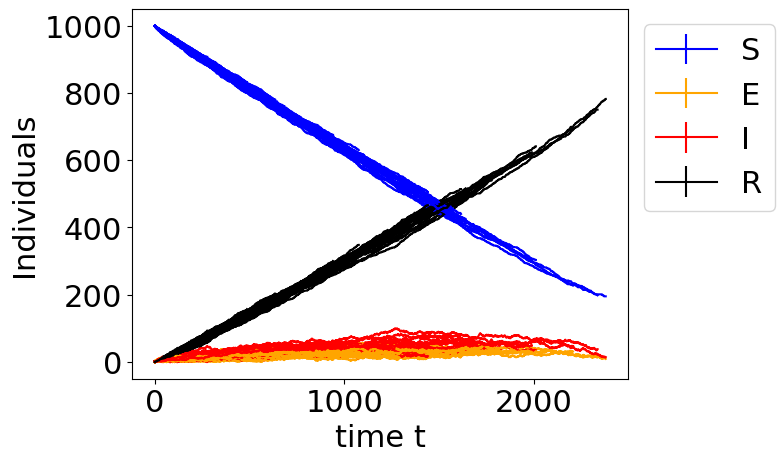

In [68]:
comps = ['S', 'E', 'I', 'R']
colors = ['b', 'orange', 'r', 'k']

fig_homo = plt.figure()
for nr in range(nruns):
    i = 0
    for ind in comps:
        plt.errorbar(range(len(allt[nr])),allr[nr][ind] ,yerr=0,c=colors[i])
        i += 1
plt.legend(comps)

plt.legend(comps,bbox_to_anchor= [1,1])
plt.ylabel('Individuals')
plt.xlabel('time t')

## heterogeneous

In [69]:
compartments = list("FCEIR")

rates = {'alpha': 0.1, 'gamma': 1/3, 'beta': 1/5, 'red_reck': 1.5, 'red_scared': 0.5}


link_transmission = [
    ('I', 'F',rates['alpha']*rates['red_scared'], 'I', 'E'),
    ('I', 'C',rates['alpha']*rates['red_reck'], 'I', 'E')
]



In [70]:
allt_het, allr_het = n_run_model(nruns,network, rates, compartments, link_transmission,False, infected_ratio)

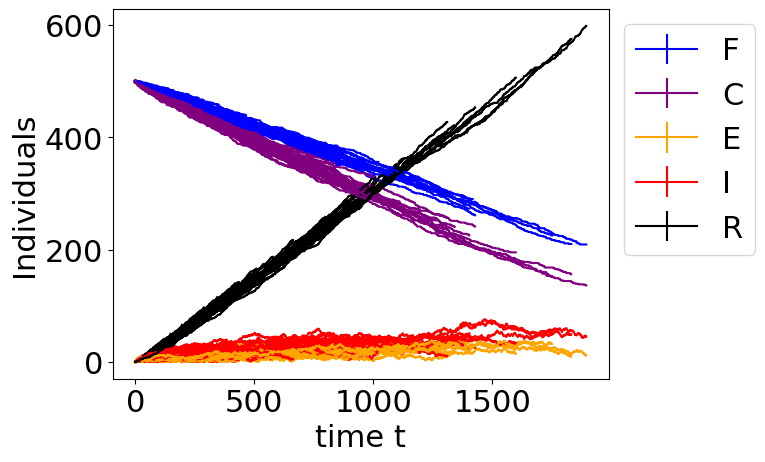

In [71]:
comps = ['F', 'C', 'E', 'I', 'R']
colors = ['b', 'purple', 'orange', 'r', 'k']
fig_het = plt.figure()
i = 0
for nr in range(nruns):
    for ind in comps:
        plt.errorbar(range(len(allt_het[nr])), allr_het[nr][ind],yerr=0,c=colors[i])
        i += 1
    i = 0
plt.legend(comps,bbox_to_anchor= [1,1])
plt.ylabel('Individuals')
plt.xlabel('time t');

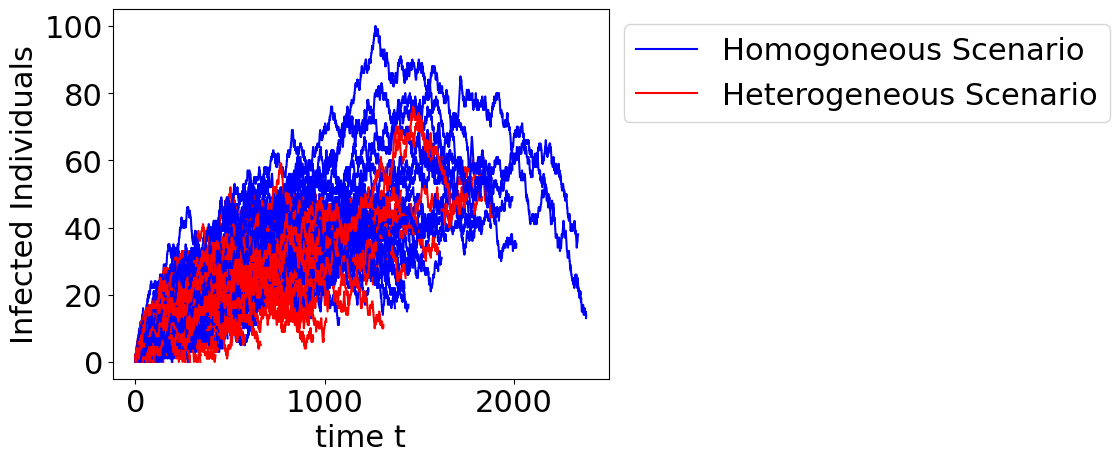

In [72]:
for nr in range(nruns):
    plt.plot(range(len(allt[nr])), allr[nr]['I'], c = 'b')
    plt.plot(range(len(allt_het[nr])), allr_het[nr]['I'], c= 'r')
plt.legend(['Homogoneous Scenario', 'Heterogeneous Scenario'], bbox_to_anchor=[1,1]) ; 
plt.ylabel('Infected Individuals')
plt.xlabel('time t');

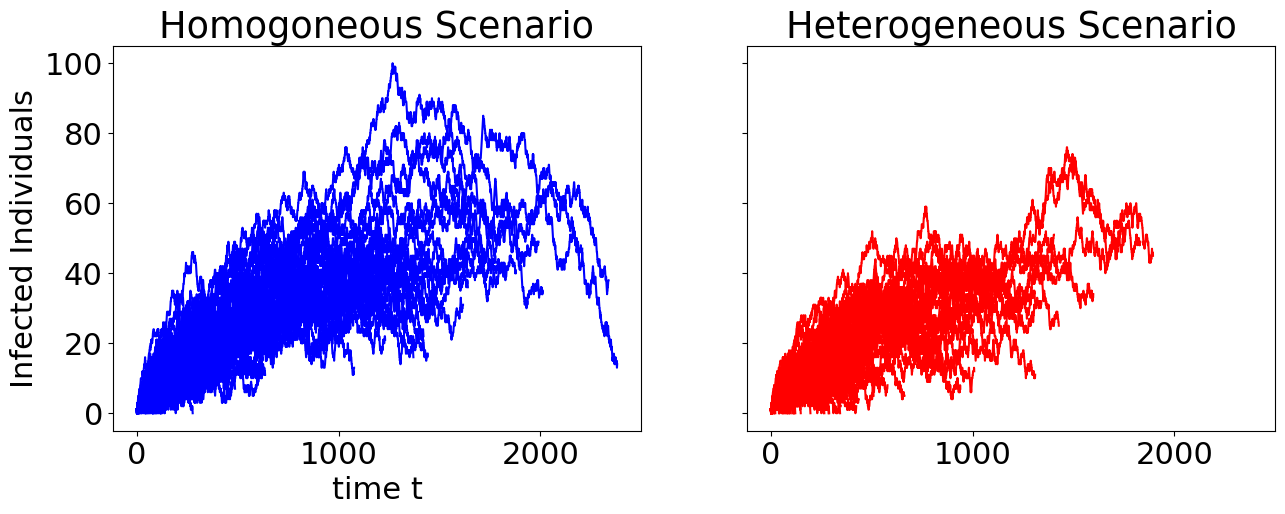

In [73]:
fig, ax = plt.subplots(1,2, sharex = True, sharey = True,figsize = (15,5))
for nr in range(nruns):
    ax[0].plot(range(len(allt[nr])), allr[nr]['I'], c = 'b')
    ax[1].plot(range(len(allt_het[nr])), allr_het[nr]['I'], c= 'r')
    ax[0].set_ylabel('Infected Individuals')
    ax[0].set_xlabel('time t');
    ax[0].set_title('Homogoneous Scenario'  ) 
    ax[1].set_title('Heterogeneous Scenario'  ) 

# albert barabasi

In [79]:
N = 1000
network = nx.barabasi_albert_graph(N, 5, seed=2 )

In [80]:
sum([network.degree()[i] for i in range(len(network.degree()))])/len(network.degree())

9.95

In [82]:
G = network

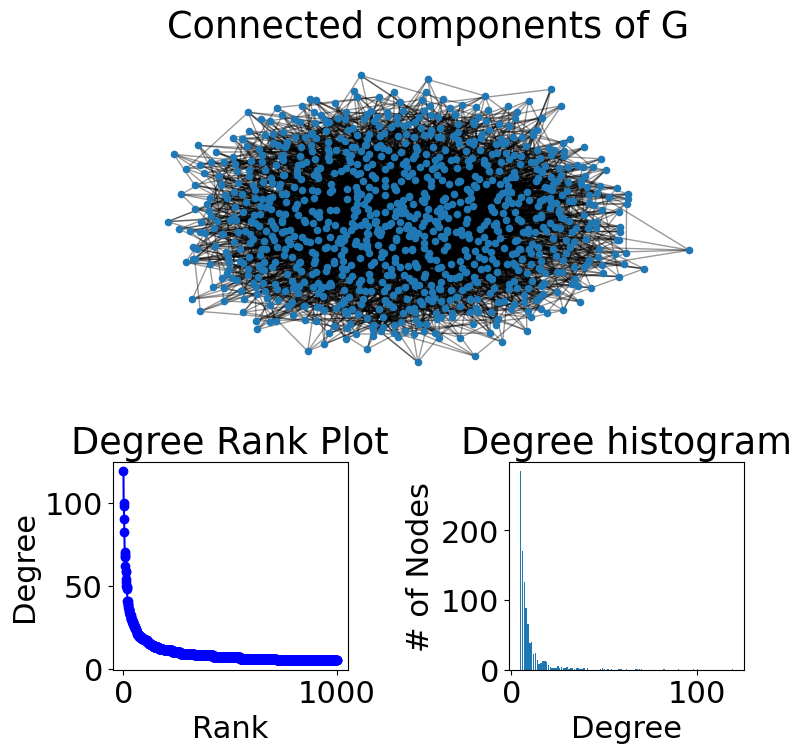

In [83]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

## homogeneous

In [84]:
# model settings
compartments = list("SEIR")

rates = {'alpha': 0.1, 'gamma': 1/3, 'beta': 1/5, 'red': 1}



link_transmission = [
        ('I', 'S',rates['alpha'] * rates['red'], 'I', 'E')]

infected_ratio = 0.001

allt, allr = n_run_model(nruns,network, rates, compartments, link_transmission, True,infected_ratio )

Text(0.5, 0, 'time t')

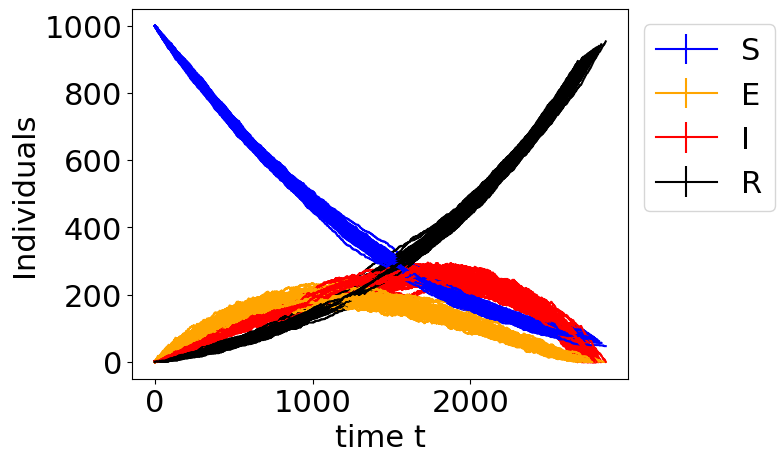

In [85]:
comps = ['S', 'E', 'I', 'R']
colors = ['b', 'orange', 'r', 'k']

fig_homo = plt.figure()
for nr in range(nruns):
    i = 0
    for ind in comps:
        plt.errorbar(range(len(allt[nr])),allr[nr][ind] ,yerr=0,c=colors[i])
        i += 1
plt.legend(comps)

plt.legend(comps,bbox_to_anchor= [1,1])
plt.ylabel('Individuals')
plt.xlabel('time t')

## heterogeneous

In [86]:
compartments = list("FCEIR")

rates = {'alpha': 0.1, 'gamma': 1/3, 'beta': 1/5, 'red_reck': 1.5, 'red_scared': 0.5}


link_transmission = [
    ('I', 'F',rates['alpha']*rates['red_scared'], 'I', 'E'),
    ('I', 'C',rates['alpha']*rates['red_reck'], 'I', 'E')
]



In [87]:
allt_het, allr_het = n_run_model(nruns,network, rates, compartments, link_transmission,False, infected_ratio)

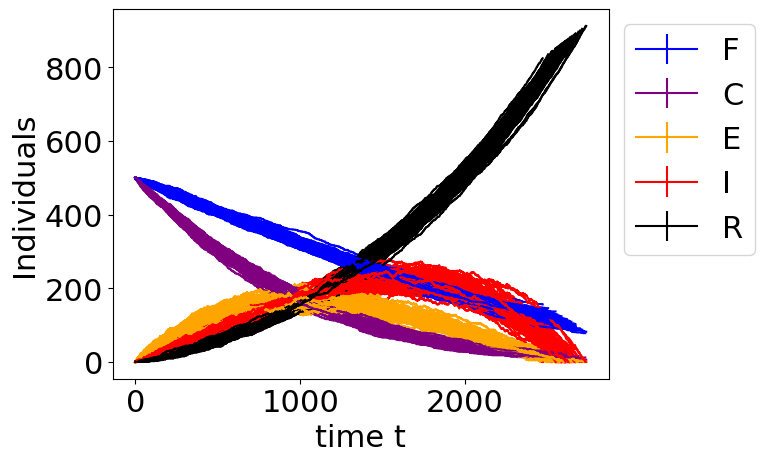

In [88]:
comps = ['F', 'C', 'E', 'I', 'R']
colors = ['b', 'purple', 'orange', 'r', 'k']
fig_het = plt.figure()
i = 0
for nr in range(nruns):
    for ind in comps:
        plt.errorbar(range(len(allt_het[nr])), allr_het[nr][ind],yerr=0,c=colors[i])
        i += 1
    i = 0
plt.legend(comps,bbox_to_anchor= [1,1])
plt.ylabel('Individuals')
plt.xlabel('time t');

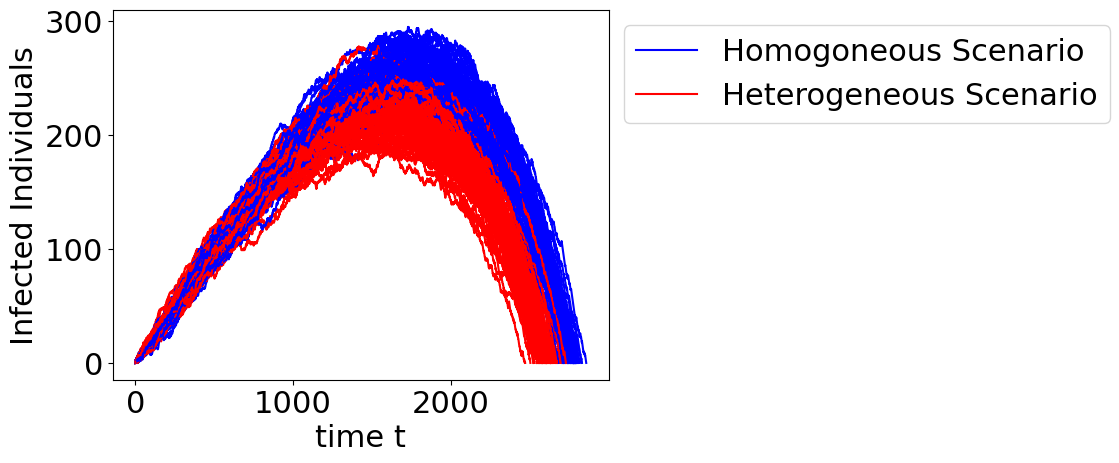

In [89]:
for nr in range(nruns):
    plt.plot(range(len(allt[nr])), allr[nr]['I'], c = 'b')
    plt.plot(range(len(allt_het[nr])), allr_het[nr]['I'], c= 'r')
plt.legend(['Homogoneous Scenario', 'Heterogeneous Scenario'], bbox_to_anchor=[1,1]) ; 
plt.ylabel('Infected Individuals')
plt.xlabel('time t');

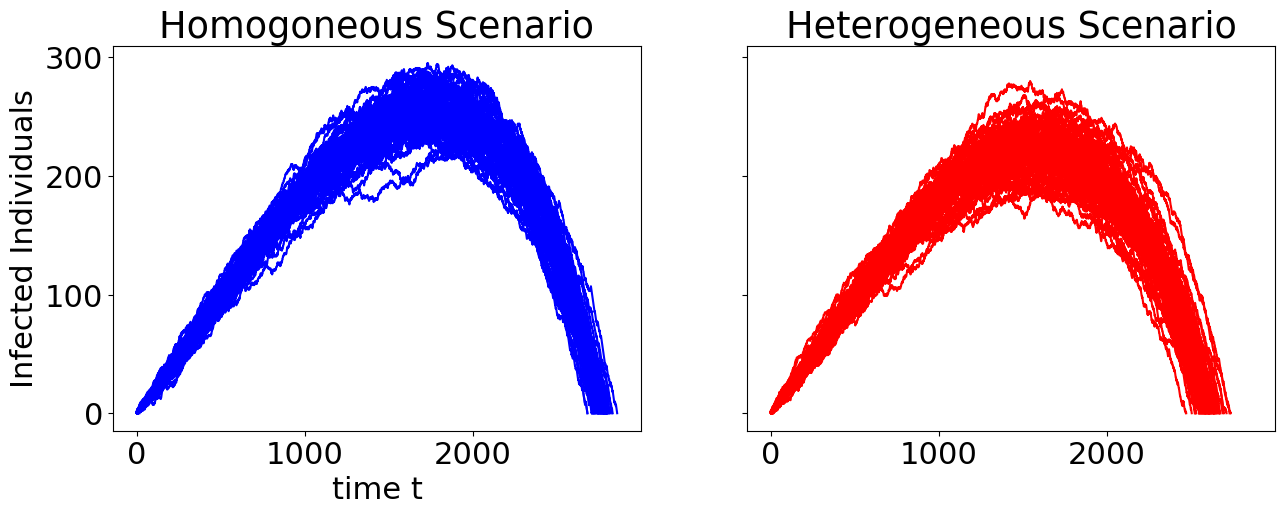

In [90]:
fig, ax = plt.subplots(1,2, sharex = True, sharey = True,figsize = (15,5))
for nr in range(nruns):
    ax[0].plot(range(len(allt[nr])), allr[nr]['I'], c = 'b')
    ax[1].plot(range(len(allt_het[nr])), allr_het[nr]['I'], c= 'r')
    ax[0].set_ylabel('Infected Individuals')
    ax[0].set_xlabel('time t');
    ax[0].set_title('Homogoneous Scenario'  ) 
    ax[1].set_title('Heterogeneous Scenario'  ) 